In [1]:
from albumentations import (
    HorizontalFlip, VerticalFlip, RandomRotate90,
    RandomBrightnessContrast, HueSaturationValue,
    RGBShift, Compose,GaussianBlur,Sharpen
)
import cv2
import os
from tqdm import tqdm

In [2]:
INPUT_DIR = "successful_images"
OUTPUT_DIR = "augmented_images"
AUGMENTATIONS_PER_IMAGE = 6  
os.makedirs(OUTPUT_DIR, exist_ok=True)

augmentations = [
    HorizontalFlip(p=1),                   
    VerticalFlip(p=1),                     
    RandomRotate90(p=1),                 
    RandomBrightnessContrast(p=1, brightness_limit=0.5, contrast_limit=0.3), 
    HueSaturationValue(p=1, hue_shift_limit=40, sat_shift_limit=50, val_shift_limit=40), 
    RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=1)       
]

for filename in tqdm(os.listdir(INPUT_DIR)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(INPUT_DIR, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        base_name = os.path.splitext(filename)[0]
        
        for i, aug in enumerate(augmentations):
            augmented = aug(image=img)["image"]
            cv2.imwrite(
                os.path.join(OUTPUT_DIR, f"{base_name}_aug_{i+1}.jpg"), 
                cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)
            )

print(f" Generated 6 augmented versions per image in '{OUTPUT_DIR}/'")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 491/491 [00:46<00:00, 10.58it/s]

 Generated 6 augmented versions per image in 'augmented_images/'


In [3]:
OUTPUT_DIR = "augmented_images"

total_images = 0
original_images = set() 

for filename in os.listdir(OUTPUT_DIR):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        total_images += 1
        
        if '_aug_' in filename:
            base_name = filename.split('_aug_')[0]
            original_images.add(base_name)
        else:
            original_images.add(filename.split('.')[0])

print(f"\nAugmentation Statistics:")
print(f"Total augmented images: {total_images}")
print(f"Original images used: {len(original_images)}")
print(f"Average augmentations per original: {total_images/len(original_images):.1f}")


Augmentation Statistics:
Total augmented images: 2946
Original images used: 491
Average augmentations per original: 6.0


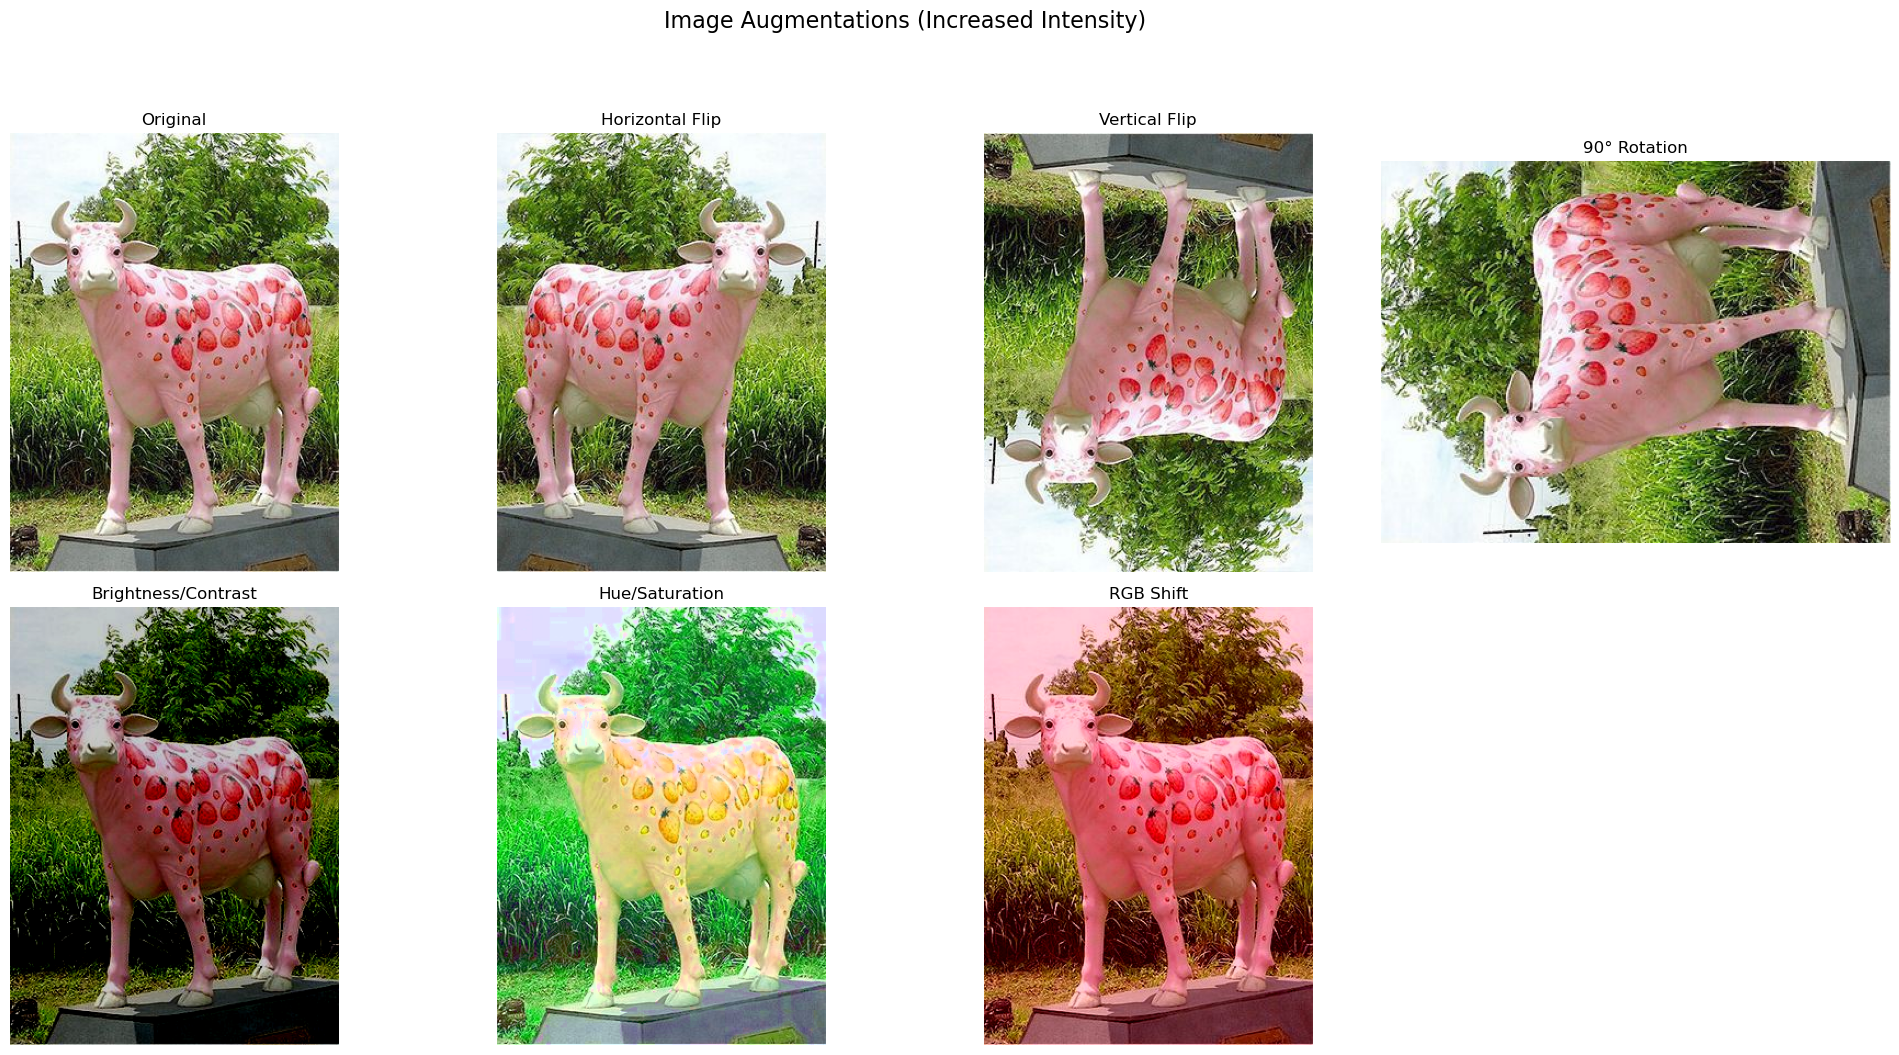

In [4]:
import matplotlib.pyplot as plt
import cv2
import os
from albumentations import (
    HorizontalFlip, VerticalFlip, RandomRotate90,
    RandomBrightnessContrast, HueSaturationValue, RGBShift
)

def plot_augmentations(image_path, save_path=None):
    # Define augmentations with increased intensity values
    augmentations = [
        ("Original", None),
        ("Horizontal Flip", HorizontalFlip(p=1)),
        ("Vertical Flip", VerticalFlip(p=1)),
        ("90° Rotation", RandomRotate90(p=1)),
        ("Brightness/Contrast", RandomBrightnessContrast(p=1, brightness_limit=0.5, contrast_limit=0.3)),  
        ("Hue/Saturation", HueSaturationValue(p=1, hue_shift_limit=40, sat_shift_limit=50, val_shift_limit=40)),  
        ("RGB Shift", RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=1)) 
    ]
    
    # Read and convert image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create figure
    plt.figure(figsize=(20, 10))
    plt.suptitle("Image Augmentations (Increased Intensity)", fontsize=16, y=1.05)
    
    # Plot each augmentation
    for i, (name, aug) in enumerate(augmentations, 1):
        plt.subplot(2, 4, i)
        if aug:
            augmented = aug(image=img)["image"]
        else:
            augmented = img
            
        plt.imshow(augmented)
        plt.title(name)
        plt.axis('off')
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=100)
    plt.show()

image_path = "successful_images/image_0226.jpeg"
plot_augmentations(image_path)